In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
def install_libraries() :
 
    libraries_to_install = ["numpy","pandas","matplotlib","seaborn","scikit-learn"]

    for library in libraries_to_install:
        try:
            __import__(library)
            print(f"{library} is already installed.")
            
        except ImportError:
            !pip install {library}

In [3]:
install_libraries()

numpy is already installed.
pandas is already installed.
matplotlib is already installed.
seaborn is already installed.


In [4]:
def import_libraries():
    
    try :
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        print('numpy,pandas,matplotlib and seaborn have been imported successfully')
        return np,pd,plt,sns
    
    except  : 
        print('Please install the libraries first to install the packages please use this function (install_libraries)')
        return None
    

In [5]:
np,pd,plt,sns=import_libraries()

numpy,pandas,matplotlib and seaborn have been imported successfully


In [5]:
import pandas as pd

def read_data():
    while True:
        data_type = input("Enter the data type (csv, excel, sql): ").lower()
        
        if data_type not in ['csv', 'excel', 'sql']:
            print("Unsupported data type. Supported types: 'csv', 'excel', 'sql'")
            continue
        
        data_path = input("Enter the path to the data file: ")
        
        try:
            if data_type == 'csv':
                data = pd.read_csv(data_path)
            elif data_type == 'excel':
                data = pd.read_excel(data_path)
            elif data_type == 'sql':
                print("Note: Reading from SQL databases requires additional setup.")
                data = None  # Placeholder for SQL data loading
        except FileNotFoundError:
            print("File not found. Please check the file path.")
            continue
        
        print("Your data has been loaded")
        return data



In [8]:
df = read_data()

Enter the data type (csv, excel, sql): csv
Enter the path to the data file: C:\Users\user\Documents\GitHub\Electro-Pi\Auto EDA\International_Report_Passengers.csv
Your data has been loaded


In [10]:
df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [11]:
df.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [12]:
df.shape

(5, 16)

In [13]:
df.dtypes

data_dte        object
Year             int64
Month            int64
usg_apt_id       int64
usg_apt         object
usg_wac          int64
fg_apt_id        int64
fg_apt          object
fg_wac           int64
airlineid        int64
carrier         object
carriergroup     int64
type            object
Scheduled        int64
Charter          int64
Total            int64
dtype: object

In [13]:
def handle_missing_values(dataframe,method,inplace=True):
    
    try :  
        if method == 'mean' :
            df = dataframe.fillna(dataframe.mean())
            
        elif method == 'median' :
            df = dataframe.fillna(dataframe.median())
            
        elif method == 'drop' :
            df = dataframe.dropna()
            
        else : 
            raise ValueError('Please enter type of handling mean, median or drop')
            
    except Exception as e:
        print(f"An error occurred: {e}")
        df = None     
    
    return df 

In [14]:
handled_data = handle_missing_values(df, method='drop')

(678188, 16)

In [15]:
handled_data.isna().sum()

data_dte        0
Year            0
Month           0
usg_apt_id      0
usg_apt         0
usg_wac         0
fg_apt_id       0
fg_apt          0
fg_wac          0
airlineid       0
carrier         0
carriergroup    0
type            0
Scheduled       0
Charter         0
Total           0
dtype: int64

In [16]:
def handle_categorical_data (dataframe,method,inplace) :
    
    try : 
        df = dataframe if inplace else dataframe.copy()
        columns = dataframe.select_dtypes(include=['object'])
        
        if method == 'OHE' :
            df = pd.get_dummies(dataframe,columns)
        elif method == 'LE' :
            from sklearn.preprocessing import LabelEncoder
            encoder = LabelEncoder()
            for col in columns:
                df[col] = encoder.fit_transform(dataframe[col])
                
        else:
            raise ValueError('Invalid method. Please enter "OHE" for one hot encoder or "LE" for label encoder')
            
    except Exception as e:
        print(f"An error occurred: {e}")
        df = None
        
    return df

In [17]:
handled_data = handle_categorical_data(handled_data,'LE',inplace=True)

In [18]:
handled_data.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,147,2014,5,14492,652,36,11032,259,148,19534,125,0,0,0,315,315
1,170,2007,6,13204,453,33,16085,1164,951,20364,160,0,0,0,683,683
2,348,2005,12,11433,187,43,10411,56,277,20344,436,1,0,0,1010,1010
3,106,2003,4,13487,500,63,16304,1287,148,20204,349,1,0,0,508,508
4,348,2005,12,12016,293,5,11138,242,766,20312,511,1,0,0,76,76


In [19]:
def scaling_data(dataframe,method,inplace):
    
    try : 
        df = dataframe if inplace else dataframe.copy()
        
        if method == 'min_max' :
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            df = scaler.fit_transform(handled_data)
            df = pd.DataFrame(df, columns = handled_data.columns)

        
        elif method == 'standard' :
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            df = scaler.fit_transform(handled_data)
            df = pd.DataFrame(df, columns = handled_data.columns)
            
        else:
            raise ValueError('Invalid method. Please enter "min_max" or "standard" ')
            
    except Exception as e:
        print(f"An error occurred: {e}")
        df = None
        
    
    return df



In [20]:
scaled_df = scaling_data(handled_data,method='standard',inplace=True)
scaled_df.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,-0.310888,0.898772,-0.394140,0.682838,1.311775,-0.303480,-1.258269,-1.109211,-1.094926,-0.971225,-1.049933,-1.129131,0.0,-0.752303,0.124568,-0.746339
1,-0.091740,0.095614,-0.105699,0.170431,0.314147,-0.410318,1.324087,1.241363,1.645232,0.653907,-0.839658,-1.129131,0.0,-0.752303,0.510359,-0.703267
2,1.604275,-0.133859,1.624946,-0.534128,-1.019365,-0.054190,-1.575633,-1.636466,-0.654726,0.614747,0.818514,0.885637,0.0,-0.752303,0.853168,-0.664993
3,-0.701543,-0.363333,-0.682581,0.283017,0.549768,0.658068,1.436007,1.560833,-1.094926,0.340628,0.295830,0.885637,0.0,-0.752303,0.326899,-0.723750
4,1.604275,-0.133859,1.624946,-0.302192,-0.487966,-1.407479,-1.204097,-1.153365,1.013938,0.552091,1.269104,0.885637,0.0,-0.752303,-0.125986,-0.774313


In [21]:
def create_boxplot(data, column, title=None, x_label=None, y_label=None) :
    
    plt.figure(figsize=(8, 6))
    plt.boxplot(data[column], vert=True)
    plt.title(title if title else f"Box Plot of {column}")
    plt.xlabel(x_label if x_label else column)
    plt.ylabel(y_label if y_label else "Values")
    plt.show()
    

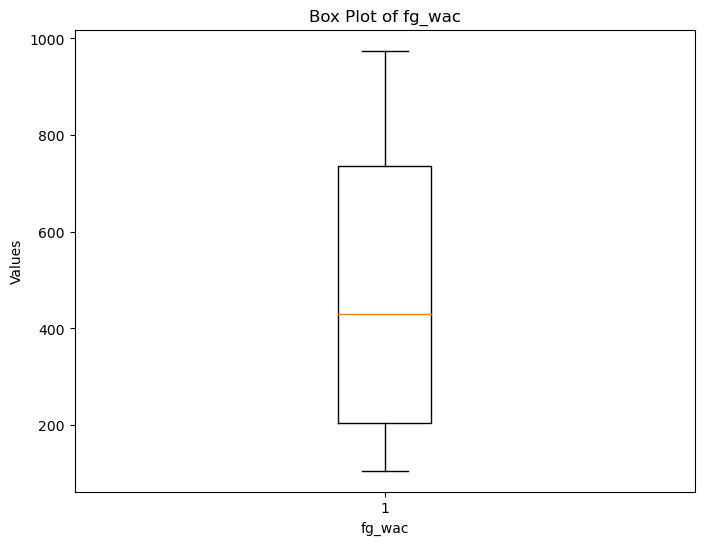

In [39]:
create_boxplot(handled_data,column='fg_wac')

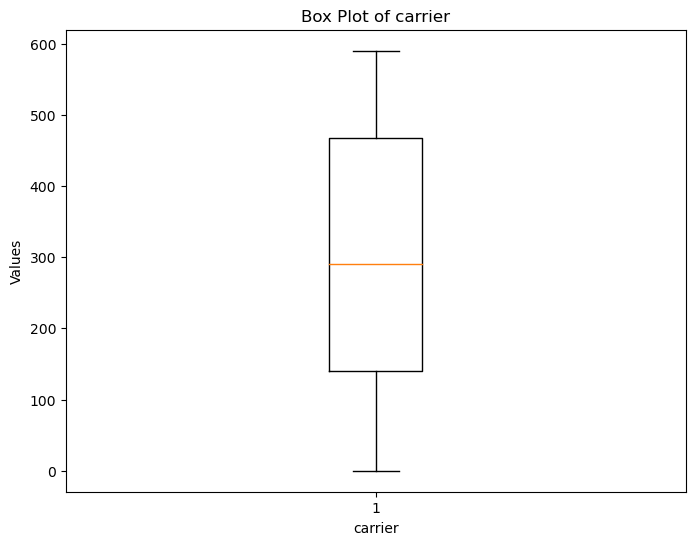

In [23]:
create_boxplot(handled_data,column='carrier')

In [29]:
def create_barchart(data, x_column, y_column, title=None, x_label=None, y_label=None):

    plt.figure(figsize=(8, 6))
    plt.bar(data[x_column], data[y_column])
    plt.title(title if title else f"Bar Chart of {y_column} vs. {x_column}")
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else y_column)
    plt.show()

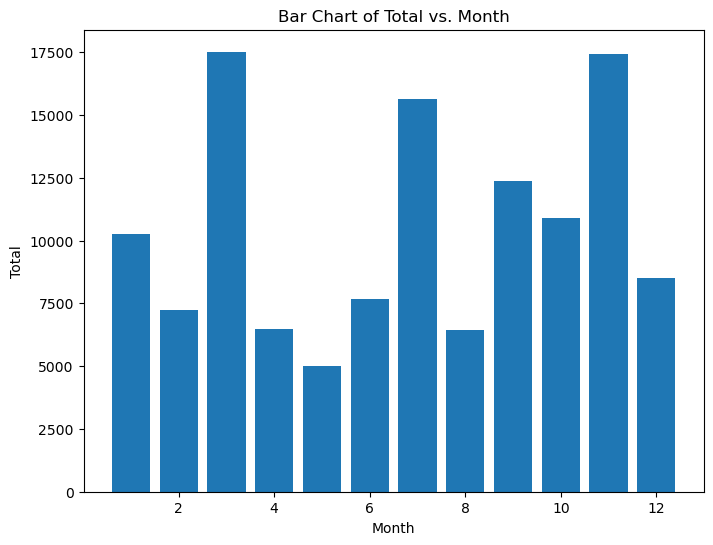

In [31]:
create_barchart(handled_data[0:1000],x_column = 'Month', y_column= 'Total') # I used from [0:1000] because it is taking for ever to run 

In [32]:
def create_scatter(data, x_column, y_column, title=None, x_label=None, y_label=None, color='blue', alpha=0.5, size=30):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[x_column], data[y_column], c=color, alpha=alpha, s=size)
    plt.title(title if title else f"Scatter Plot of {y_column} vs. {x_column}")
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else y_column)
    plt.grid(True)
    plt.show()

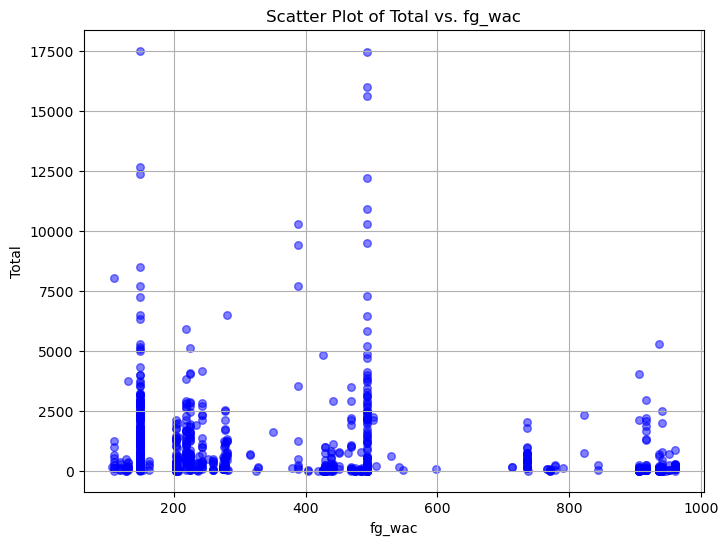

In [40]:
create_scatter(handled_data[0:1000],x_column = 'fg_wac', y_column= 'Total') 

In [56]:
def create_pie_chart(data, labels_column, sizes_column, title=None, colors=None, explode=None):
    plt.figure(figsize=(8, 6))
    plt.pie(data[sizes_column], labels=data[labels_column], explode=explode)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(title if title else f"Pie Chart of {sizes_column} based on {labels_column}")
    plt.show()